In [177]:
import os
import json
import math
import rasterio
from rasterio.plot import reshape_as_image
import rasterio.mask
from rasterio.features import rasterize
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
from shapely.ops import cascaded_union


import matplotlib.pyplot as plt


### Open image with rasterio:

In [50]:
with rasterio.open("LFMP_ortho.tif") as src:
    img = src.read()
    meta = src.meta

img = reshape_as_image(img)

plt.imshow(img)

### Read Geojson as  a dataframe:

In [178]:
train_df = gpd.read_file('product_ADBLucem_LFMP_1905_2.json')


train_df = train_df.drop(columns=['originated', 'readonly',
       'notvalidated', 'lock', 'elev', 'hacc', 'iata', 'name', 'idarpt',
       'acft', 'idnumber', 'termref', 'pcn', 'restacft', 'status', 'surftype',
       'length', 'width', 'color', 'direc', 'style', 'rwymktyp', 'asda',
       'availPavedSurfFromThr', 'brngmag', 'brngtrue', 'cat', 'ellipse',
       'geound', 'lda', 'rops_landing_length', 'rwyslope', 'tdze', 'tdzslope',
       'thrtype', 'toda', 'tora', 'vasis', 'bridge', 'gsurftyp', 'runwayexit',
       'imagery_date'])

#### Only polygon:

In [179]:
train_df = train_df[train_df["geometry"].geom_type == 'Polygon']

In [88]:
features_list = []
for e in train_df['feattype']:
    if e['value'] not in features_list:
        features_list.append(e['value'])

print(features_list)

['Apron.apronelement', 'FinalApproachAndTakeOffArea.finalapproachandtakeoffarea', 'ParkingStandArea.parkingstandarea', 'Runway.runwaydisplacedarea', 'Runway.runwayelement', 'Runway.runwaymarking', 'Runway.runwayshoulder', 'ServiceRoad.serviceroad', 'Stopway.stopway', '0', 'Taxiway.taxiwayshoulder', 'TouchDownLiftOffArea.touchdownliftoffarea', 'VerticalStructure.verticalpolygonalstructure', 'Water.water']


In [89]:
outfolder = "/Users/salimbaddou/PIE"  #folder where the mask is stored
os.makedirs(outfolder, exist_ok=True)

In [133]:
def poly_from_utm(polygon, transform):
    poly_pts = []
    
    # make a polygon from multipolygon
    poly = cascaded_union(polygon)
    for i in np.array(poly.exterior.coords):
        
        # transfrom polygon to image crs, using raster meta
        poly_pts.append(~transform * tuple(i))
        
    # make a shapely Polygon object
    new_poly = Polygon(poly_pts)
    return new_poly

# creating binary mask for field/not_filed segmentation.


im_size = (src.meta['height'], src.meta['width'])
whole_mask = np.zeros([src.meta['height'],src.meta['width']])
for i,f in enumerate(features_list):
    poly_shp = []
    data_geom = train_df[train_df['feattype'] == {'value': f}].geometry
    for g in data_geom.values:


        poly = poly_from_utm(g, src.meta['transform'])
        poly_shp.append(poly)

        if g.geom_type == 'Polygon':
            poly = poly_from_utm(g, src.meta['transform'])
            poly_shp.append(poly)
        else:
            for p in g:
                poly = poly_from_utm(p, src.meta['transform'])
                poly_shp.append(poly)






        mask = rasterize(shapes=poly_shp,out_shape=im_size)*math.floor(255/len(features_list))*(i+1)
        whole_mask = whole_mask + mask
        




img_path = os.path.join(outfolder, 'test_1.png')
img_image = cv2.cvtColor(whole_mask, cv2.COLOR_RGB2BGR)
cv2.imwrite(img_path, img_image)

# plotting the mask

plt.figure(figsize=(10,10))
plt.imshow(mask)

(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)
(5000, 4700)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [105]:
for i,f in enumerate(features_list):
    print(math.floor(255/len(features_list))*(i+1))

18
36
54
72
90
108
126
144
162
180
198
216
234
252


In [ ]:
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] != 0:
            img[i][j][0] = 100
            img[i][j][1] = 100
            img[i][j][2] = 100
        

In [181]:
for i in train_df[train_df['feattype'] == {'value': 'Runway.runwaymarking'}].geometry.values:
    print(i)
    

POLYGON ((10.380918843857 43.6743960978144, 10.381370868158 43.6741522528926, 10.3831408468821 43.6758686125, 10.3826888168447 43.6761124643964, 10.380918843857 43.6743960978144))
POLYGON ((10.4038116802428 43.6927047990638, 10.4056992283986 43.6945333576962, 10.4052457867868 43.694778061323, 10.4033582447551 43.6929494952294, 10.4038116802428 43.6927047990638))
POLYGON ((10.3834458354607 43.6729663562707, 10.3844960059669 43.6739845806798, 10.3840426331903 43.6742292004999, 10.3829924660958 43.6732109719404, 10.3834458354607 43.6729663562707))


In [115]:
a = np.zeros([5,4])

In [116]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [175]:
[{'value': 'Aerodrome.aerodromereferencepoint'},
 {'value': 'PaintedCenterline.paintedcenterline'},
 {'value': 'ParkingStandLocation.parkingstandlocation'},
 {'value': 'Runway.runwaydisplacedarea'},
 {'value': 'Runway.runwayelement'},
 {'value': 'Runway.runwayexitline'},
 {'value': 'Runway.runwaymarking'},
 {'value': 'Runway.runwaythreshold'},
 {'value': '0'},
 {'value': 'ImageryData.imagerydata'}]

(3, 6200, 7400)

In [31]:
import cv2

In [ ]:
img_path = os.path.join(outfolder, str(row['Field_Id']) + '.png')
img_image = cv2.cvtColor(img_image, cv2.COLOR_RGB2BGR)
cv2.imwrite(img_path, img_image)

In [101]:

#src = rasterio.open(raster_path, 'r', driver="JP2OpenJPEG")
outfolder = "/Users/salimbaddou/PIE"
os.makedirs(outfolder, exist_ok=True)


img_path = os.path.join(outfolder, 'test' + '.png')
img_image = cv2.cvtColor(mask*50, cv2.COLOR_BGR2HSV)
cv2.imwrite(img_path, img_image)
       

True

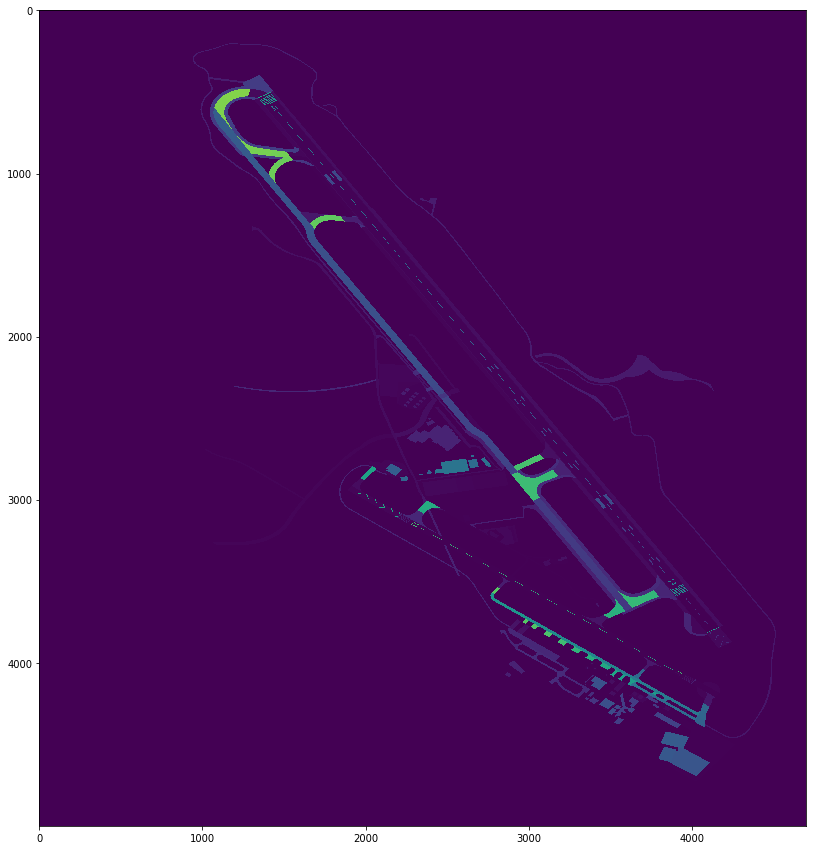

In [176]:
plt.figure(figsize=(15,15))
plt.imshow(whole_mask)

In [39]:
mask.ncount(1)

AttributeError: 'numpy.ndarray' object has no attribute 'ncount'

In [151]:
for i in range(100):
    
    print((whole_mask == i).sum())

21571914
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
443
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
51576
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2492
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
23310
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
74788
0
0
0
0
0
0
0
0
0


In [153]:
whole_mask.shape

(5000, 4700)

In [170]:
img_path = os.path.join(outfolder, 'test_20.png')
img_image = cv2.cvtColor(whole_mask, cv2.COLOR_RGB2BGR)
cv2.imwrite(img_path, img_image)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(InputArray, OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [159]:
a = reshape_as_image(whole_mask)

ValueError: axes don't match array